# Regression on tabular data

**Agenda**:
1. Data preparation
2. Regression analysis
    1. Correlation analysis
    2. Linear regression fitting
    3. Check for normality
    4. Check for homoscedasticity
3. Results


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from statsmodels.stats.diagnostic import het_white
import statsmodels.api as sm

# Increase limit for number columns to display
pd.set_option('display.max_columns', 500)

## 1. Data preparation

In [3]:
TRAIN_DATASET_PATH = 'internship_train.csv'
train_df = pd.read_csv(TRAIN_DATASET_PATH)

We convert all non-float columns to float64:

In [4]:
train_df = train_df.astype(np.float64)

Number of nans in the dataset:

In [5]:
print(train_df.isnull().sum().sum())

0


Calculate simple statistics on dataset columns:

In [6]:
train_df.describe()

0             1             2             3             4  \
count  90000.000000  90000.000000  90000.000000  90000.000000  90000.000000   
mean     249.423944    250.236267    248.637289    249.736600    249.436178   
std      144.336393    144.022200    144.107577    144.284945    143.941581   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      125.000000    126.000000    124.000000    125.000000    125.000000   
50%      250.000000    251.000000    248.000000    250.000000    250.000000   
75%      374.000000    375.000000    374.000000    375.000000    373.000000   
max      499.000000    499.000000    499.000000    499.000000    499.000000   

                  5             6             7             8             9  \
count  90000.000000  90000.000000  90000.000000  90000.000000  90000.000000   
mean     249.656167     -0.011402      0.498548      0.499189    249.842033   
std      144.329168      7.038171      0.288682      0.500002    144.612718   
min        0.000000     -9.949874      0.000014      0.000000      0.000000   
25%      124.000000     -7.071068      0.248932      0.000000    124.000000   
50%      250.000000      0.000000      0.497136      0.000000    250.000000   
75%      374.000000      7.000000      0.747513      1.000000    376.000000   
max      499.000000      9.949874      0.999987      1.000000    499.000000   

                 10            11            12            13            14  \
count  90000.000000  90000.000000  90000.000000  90000.000000  90000.000000   
mean     249.818967    249.346778    249.899900      7.483940      7.498037   
std      144.363827    144.476128    144.310495      4.330908      4.318388   
min        0.000000      0.000000      0.000000      0.000095      0.000252   
25%      126.000000    124.000000    125.000000      3.723392      3.763626   
50%      250.000000    249.000000    251.000000      7.483265      7.505267   
75%      375.000000    375.000000    375.000000     11.242883     11.228331   
max      499.000000    499.000000    499.000000     14.999920     14.999938   

                 15            16            17            18            19  \
count  90000.000000  90000.000000  90000.000000  90000.000000  90000.000000   
mean       7.496259      7.501635      7.486463      7.523043      7.475585   
std        4.338732      4.345618      4.318031      4.323500      4.327327   
min        0.000190      0.000192      0.000067      0.000229      0.000125   
25%        3.718755      3.719537      3.758746      3.778857      3.733780   
50%        7.502682      7.515240      7.467721      7.539462      7.460267   
75%       11.258049     11.284618     11.238904     11.254751     11.211187   
max       14.999660     14.999979     14.999840     14.999857     14.999634   

                 20            21            22            23            24  \
count  90000.000000  90000.000000  90000.000000  90000.000000  90000.000000   
mean       7.494835      7.503939      7.507724      7.508681      7.472421   
std        4.325447      4.330159      4.332599      4.328966      4.345228   
min        0.000382      0.000398      0.000140      0.000382      0.000129   
25%        3.748951      3.760261      3.742810      3.768145      3.685140   
50%        7.481500      7.521563      7.520793      7.520739      7.484349   
75%       11.238128     11.248749     11.244657     11.240915     11.239795   
max       14.999953     14.999483     14.999762     14.999875     14.999987   

                 25            26            27            28            29  \
count  90000.000000  90000.000000  90000.000000  90000.000000  90000.000000   
mean       7.519205      7.515753      7.509402      7.496781      7.504014   
std        4.339104      4.333907      4.331007      4.334982      4.318553   
min        0.000192      0.000017      0.000080      0.000161      0.000437   
25%        3.760790      3.746467      3.772795      3.741697  

## 2. Regression analysis

### 2.A. Correlation analysis

**Correlation analysis** (the graph below) shows that the correlation between features 6 and 8 is high.

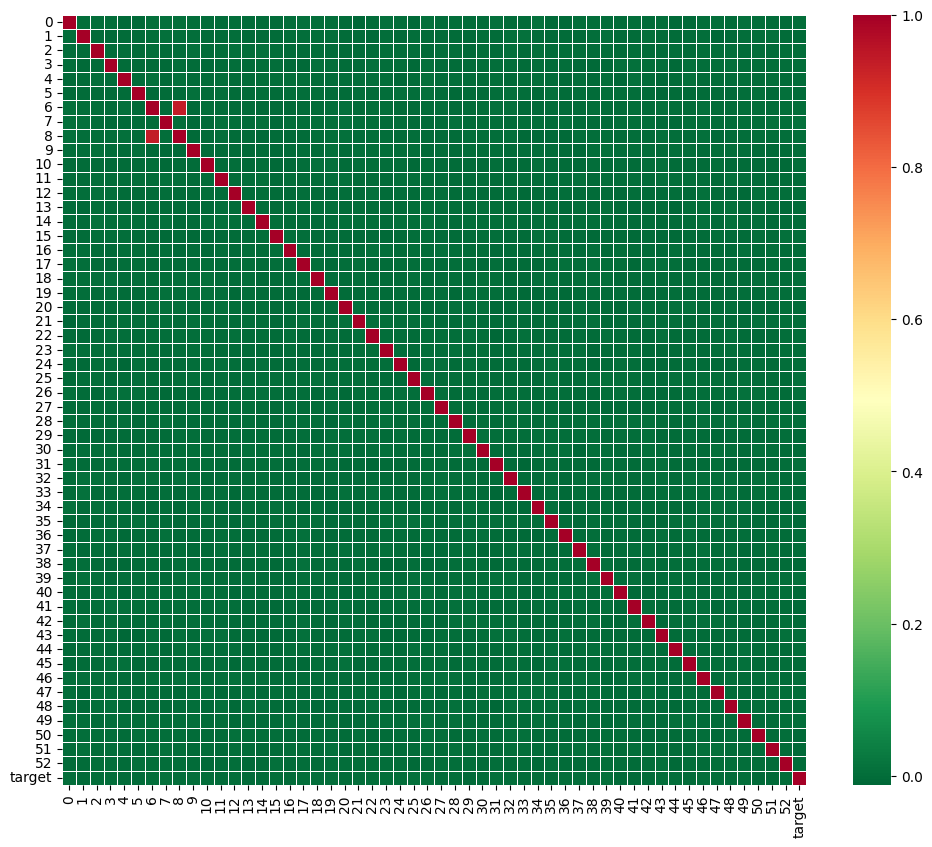

In [7]:
plt.figure(figsize=(12, 10))
train_corr = train_df.corr()
sns.heatmap(train_df.corr(), cmap='RdYlGn_r', linewidths=0.5, 
            xticklabels=train_df.columns, yticklabels=train_df.columns);

In [8]:
print(f"Correlation between features 6 and 8 is equal to {train_corr['6']['8']:.2f}")

Correlation between features 6 and 8 is equal to 0.94


The dependence of feature `8` on feature `6` is displayed on the following graph:

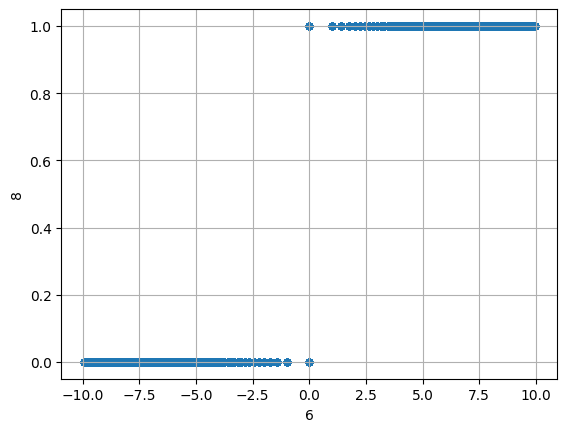

In [9]:
train_df.plot(x='6', y='8', kind='scatter', grid=True);

One of the variables should be excluded from the model due to multicolinearity issue. To decide on which of these two features is a better predictor, we plot the dependence of `target` variable on features `6` and `8`.

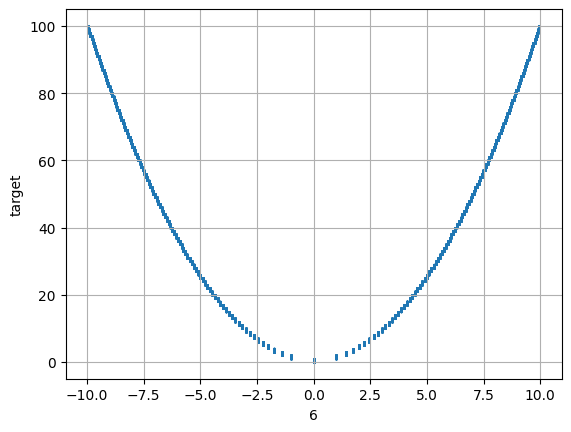

In [10]:
train_df.plot(x='6', y='target', kind='scatter', marker='.', grid=True, s=0.5);

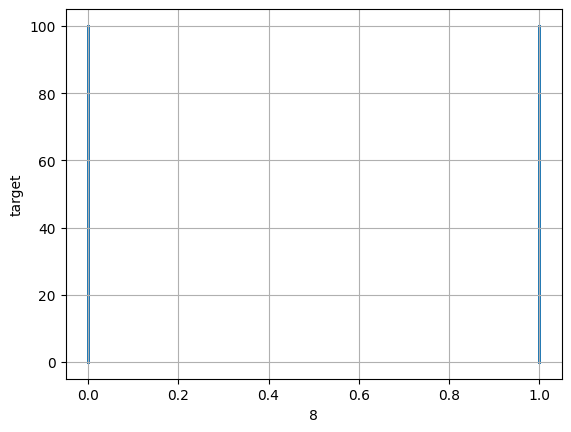

In [11]:
train_df.plot(x='8', y='target', kind='scatter', marker='.', grid=True, s=0.5);

Unexpectedly, `target` is very well predicted by feature `6`: there is a quadratic relation between `target` variable and feature `6`.

Indeed the $y = x^2$ curve gives a low value of RMSE metric:

In [12]:
predicted_target = train_df['6']**2
rmse = np.linalg.norm(predicted_target - train_df['target']) / predicted_target.shape[0]**0.5
print("RMSE between actual and predicted values of target:", rmse)

RMSE between actual and predicted values of target: 0.5760957925490628


Also no other feature seems to be that good predictor:

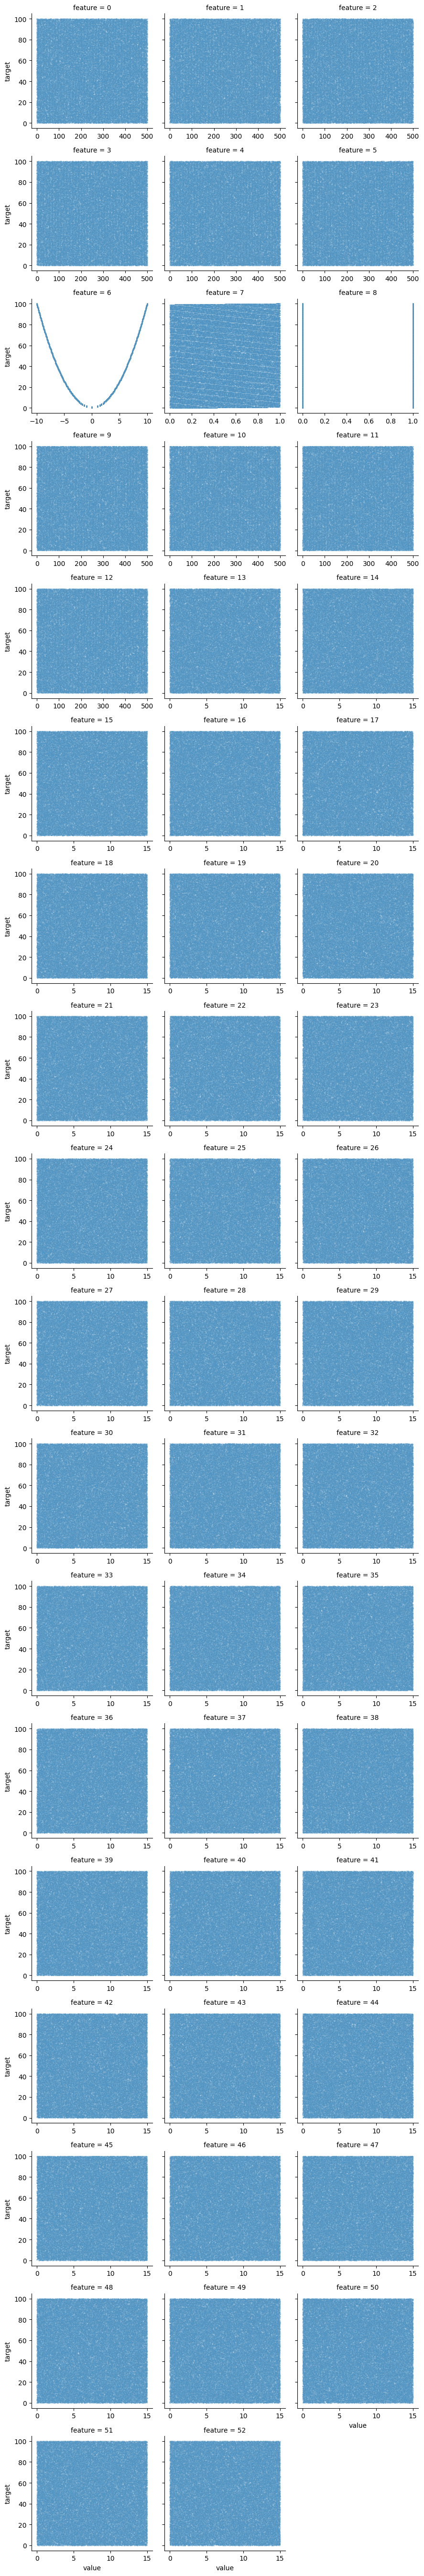

In [13]:
g = sns.FacetGrid(train_df.melt('target', var_name='feature'), col="feature", col_wrap=3, sharex=False)
g.map(sns.scatterplot, "value", "target", s=4, alpha=0.2);

We therefore remove all features and add new feature `53` that is equal to the squared value of feature `6`:

In [14]:
train_df['53'] = train_df['6']**2
train_df.drop(train_df.columns[np.r_[0:53]], axis=1, inplace=True)

### 2.B. Linear regression fitting

We assume the following hypothesis about our data:
$$
\forall i \in \{1..m\}: Y_i = a + b x_i + \epsilon_i 
$$, where $m$ is the number of samples (rows), $\epsilon_1, \dots, \epsilon_m \sim \mathcal{N}(0, \sigma^2)$ are i.i.d. random variables.

We use maximum likelihood estimators of $a$ and $b$, which is equivalent to finding $a$ and $b$ that minimize the ordinary least squares (OLS).

In [15]:
y = train_df['target']
x = train_df['53']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.017e+08
Date:                Mon, 13 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:35:07   Log-Likelihood:                -15885.
No. Observations:               90000   AIC:                         3.177e+04
Df Residuals:                   89998   BIC:                         3.179e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4975      0.002    260.499      0.000       0.494       0.501
53             1.0000   3.33e-05      3e+04      0.000       1.000       1.000
==============================================================================
Omnibus:                    77673.059   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5375.118
Skew:                           0.008   Prob(JB):                         0.00
Kurtosis:                       1.803   Cond. No.                         114.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
print(f"MLE estimate of a = {model.params[0]:.4f}")
print(f"MLE estimate of b = {model.params[1]:.4f}")

MLE estimate of a = 0.4975
MLE estimate of b = 1.0000


In [17]:
predictions = x @ model.params
residuals = train_df['target'] - predictions
rmse = np.linalg.norm(residuals) / predictions.shape[0]**0.5
print(f"RMSE = {rmse:.2f}")

RMSE = 0.29


$100\%$ of target volatility is explained by the developed model. Both parameters $a$ and $b$ are statically significant with respective estimates $0.4975$ and $1$. The RMSE metric is $0.29$.

### 2.C. Check for normality 

We check normality of residuals by plotting the "empirical pdf" of residuals. From the below graph we observe that distribution of residuals is not Gaussian but uniform:

**Note**: ideally we had to plot the separate distribution for each of $\epsilon_1, \dots, \epsilon_m$, but from the visualized distribution of all residuals we already know that the assumpltion of $\epsilon_1, \dots, \epsilon_n$ being normal does not actually hold.

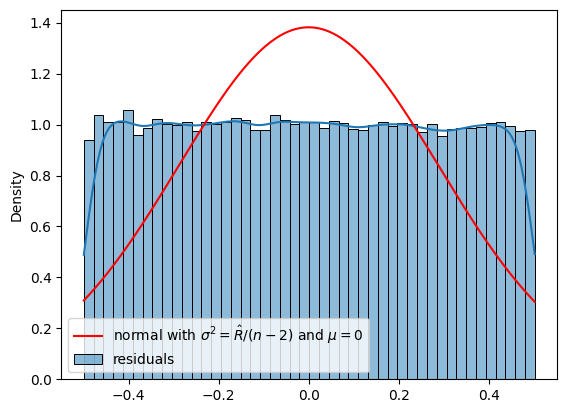

In [30]:
ax = sns.histplot(residuals, kde=True, stat='density', label='residuals')

rss = np.linalg.norm(residuals)**2

x_pdf = np.linspace(residuals.min(), residuals.max(), 300)
y_pdf = scipy.stats.norm.pdf(x_pdf, loc=0, scale=(rss / (residuals.shape[0]-2))**0.5)
ax.plot(x_pdf, y_pdf, label="normal with $\sigma^2 = \hat{R} / (n-2)$ and $\mu = 0$", c='red')
ax.legend();

### 2.D. Check for homoscedasticity

We perform White's test with $\alpha = 0.05$ to determine if heteroscedasticity is present in the regression model:

**Null hypothesis**: homoscedasticity is present <br>
**Alternative hypothesis**: heteroscedasticity is present

In [31]:
white_test = het_white(model.resid,  model.model.exog)
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
for label, val in zip(labels, white_test):
    print(f"{label}: {val:.2f}")

Test Statistic: 0.32
Test Statistic p-value: 0.85
F-Statistic: 0.16
F-Test p-value: 0.85


Based on the calculated $p$-value, we do not reject the null hypotheses. The residuals have equal deviations.

## 3. Results

* We add new feature `53` that is a squared value of feature `6`
* We train linear regression using the `target` variable and new feature `53`
* We obtain a relatively small value of RMSE metric: $0.29$
* We obtain a $100\%$ explainability of the volatility of `target` by the regression model
* The fitted model is as follows:

`target` $= 0.4975 +$ `feature 6`$^2$

* Distribution of residuals are not normal, but homoscedasticity is satisfied